### Florian Muthreich   ---   INF368   ---

# Ex3: Siamese Network

## Setup

I used the standard setup of the ZooScan dataset, with 40 classes and converted to 299x299 using the Script provided by Ketil Malde. Afterwards the dataset was split into train, validation and test set, with 100 images in validation and test set.
For training I followed the setup and train.py file provided in the GitHub. The training regime was extended to 45 rounds of 10 epochs and 1000 iterations. Models were saved after each training step (10 epochs) in the folder /models. A log can be found in /logs, with logs of train and validation loss as well as accuracy after 10 epochs.

### Visualization

I extracted the vector embeddings of the validation set for each trained epoch and fitted a pca followed by a tsne dimension reduction to 2 dimensions. The progress can be seen in the animation below. The pattern is quite chaotic in the beginning. After a while groups of point clouds start to emerge and form clusters. Noticable these clusters are not monochromatic and feature several different colors, an indication that several classes were embedded in the same neighbourhood. Furthermore the clusters change shape a lot between iterations, which is either an indication of how fluid the network tries to rearrange the embeddings or variation in the tsne method. the latter is more likely, since the network learns relatively slow, which should not cause any large changes between model iterations. i tried to fit a tsne model on the same data several times and discovered, that the two dimensions calculated from the tsne model differ with every iteration. This seems to indicate that the embeddings are not refined enough to allow for clear differentiation using tsne or have not converged for a reduction from 64 to 2 dimensions. I can show this in these two animations, which used the same data (the first 10 trained models). both were fitted with pca and tsne afterwards and produced different plots in the end. 

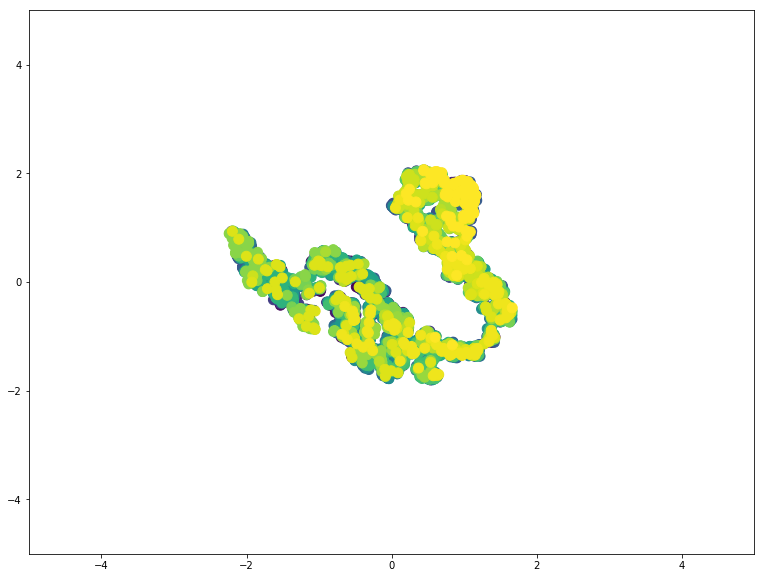

In [106]:
ani = main(res = res)
HTML(ani.to_html5_video())

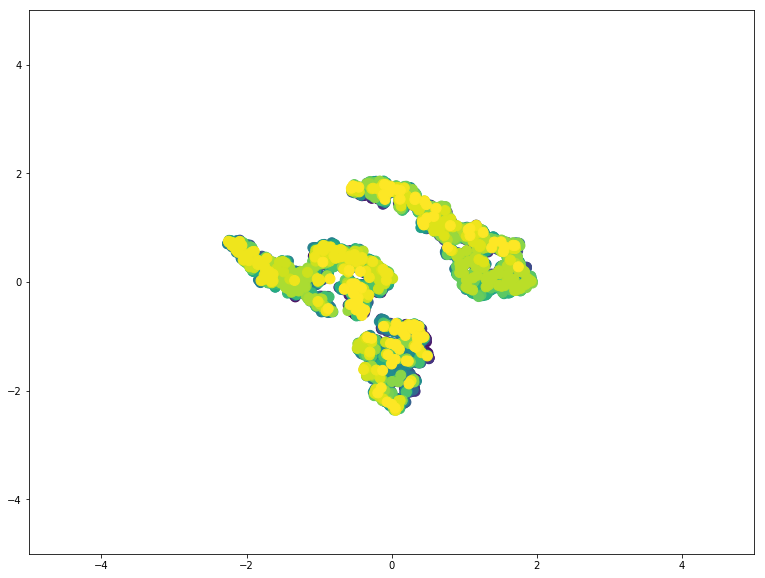

In [29]:
ani = main(res = res)
HTML(ani.to_html5_video())

### Supervised Classification

For the supervised classification I extracted the vector embeddings from the trained siamese network and trained a simple NN with 1000 hidden neurons (Relu activation, L2 Reg). I trained the simple NN on the embeddings of the training set and validated with the validation set. After 15 epochs the training accuracy was ca 63% and the validation accuracy was 45%. When looking at the confusion matrix of the predicted test set, it is noticable that some of the classes where not predicted from the model at all. for example the classes 'nauplii__Crustacea', 'Centropagidae' and 'calyptopsis' were not predicted and instead the embeddings of these classes were mostly predicted as Limacinidae. There are quite stark differences between these classes, so there must be something else causing these classes to almost completely be classified as Limacinidae. Maybe the embedding is not quite finished and needed more training. Another reason could be class imbalance during training. I have not done any measures to balance the classes and these mis identified classes could be due to low occurence of them. Synthetic sampling or over sampling could help here.


In [52]:
def converter(x):
    return list(conv_dict.keys())[list(conv_dict.values()).index(x)]

print("Classes of ")
print([converter(i) for i in [38,37,14]])
print("misidentified as :"+converter(19))

Classes of 
['nauplii__Crustacea', 'Centropagidae', 'calyptopsis']
misidentified as :Limacinidae


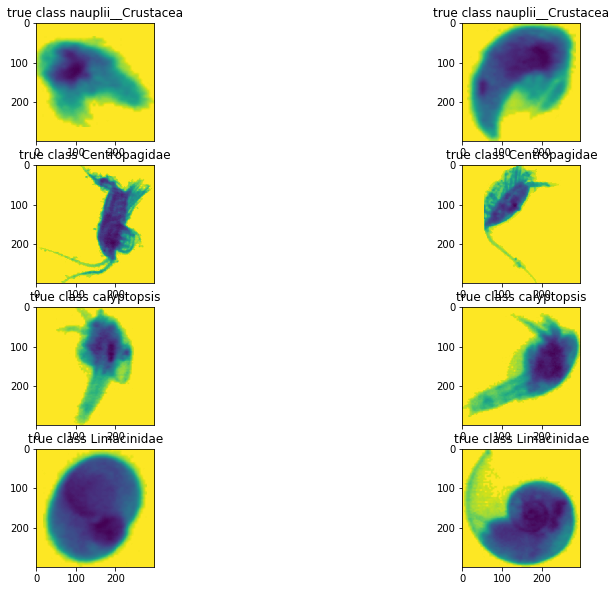

In [59]:
clas = [converter(i) for i in [38,38,37,37,14,14,19,19]]
plot_not_pred(clas)

In [42]:
#Confusion Matrix of test set
pd.set_option('display.max_columns', 50)
confusion

Predicted,0,1,2,3,4,5,6,7,8,9,10,12,13,15,17,18,19,20,21,22,23,24,25,27,29,30,31,32,33,34,35,36,39,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,73,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,5,4,3,0,0,0,0,0,0,0,1,0,7,0,3,0,0,100
1,0,82,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,100
2,0,0,9,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,81,100
3,0,0,0,0,0,46,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,100
4,0,0,0,0,7,0,0,0,0,0,0,0,0,1,1,0,0,83,1,0,0,0,1,0,0,0,0,0,6,0,0,0,0,100
5,0,0,0,1,0,41,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,1,0,0,0,0,0,100
6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,95,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,100
7,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,100
8,0,0,2,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,81,100


Looking at some misidentified images we see that the three classes Corycaide, Cyphonate and Cavoliniidae were all predicted as Phaeodaria. All of these classes from inspection look quite similar and it is understandable that the network has not sufficiently learned to differentiate between these yet, either some more training or refining of the embeddings will hopefully help here. 

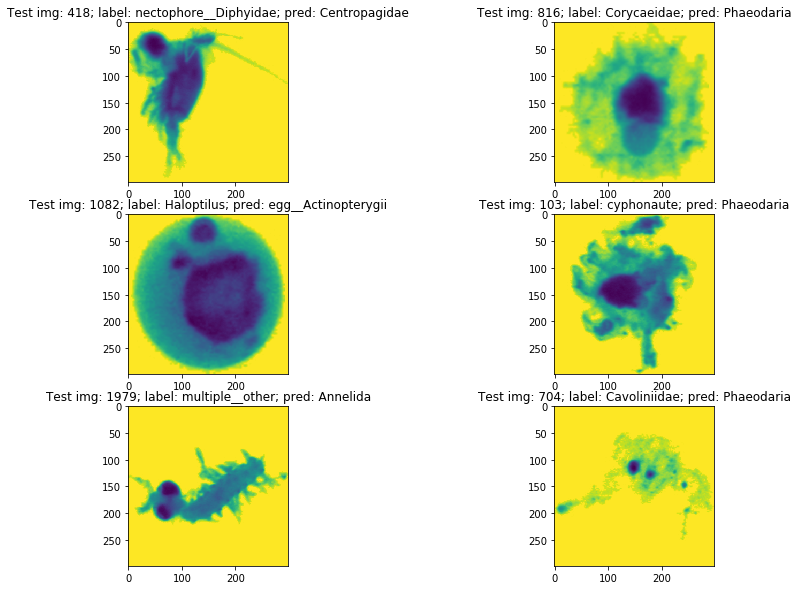

In [130]:
plot_false_pred(test_actu, test_pred)

### Conclusion

I really liked the embedding exercise and got much better results than in the Ex 1. I think there is still quite a lot of room for improvements and dataset augmentation, to balance out the classes. 

### 

Following is the code that has been used to train the NN and create the figures/plots 
Full code used in the exercise can be found on https://github.com/FM-uib/INF368
I used the Instance "instance-gpu-fmuth" With all the temporarily stored data and models saved. 

In [3]:
#load packages
import numpy as np
import glob
import os 
os.chdir("plankton_siamese")
import testing as T
from keras.models import load_model
import keras
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

### Testing triplet_generator ###
0 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
1 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
2 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)
3 a: (4, 299, 299, 3) p: (4, 299, 299, 3) n: (4, 299, 299, 3) y: (4, 2)


Using TensorFlow backend.


In [39]:
# Load Embeddings of the train, validation and test set as well as the conversion dictionary
import numpy as np
import pickle
train_x = np.load('npy_files/train_x.npy')
train_y = np.load('npy_files/train_y.npy')

valid_x = np.load('npy_files/valid_x.npy')
valid_y = np.load('npy_files/valid_y.npy')

test_x = np.load('npy_files/test_x.npy')
test_y = np.load('npy_files/test_y.npy')

with open("conv_dict.pickle", "rb") as input_file:
    conv_dict = pickle.load(input_file)

In [95]:
# function to load embeddings from image folder
def load_data(modelfile = "models/epoch_45.model", imgs = "data/validate/"): 
    import numpy as np
    import testing as t
# Convert Dict of vectors into array
    model = load_model(modelfile)
    print("load model complete")
    image_vectors = t.get_vectors(model, tdir = imgs)
    print("get vectors complete")
    vecs = np.zeros((1,64))
    y_truth = []
    conv_dict = {}
    keys = list(image_vectors.keys())
    for i in range(len(keys)):
        conv_dict[keys[i]] = i
    for c in image_vectors:
        #print(c)
        im = image_vectors[c]
        vecs = np.append(vecs,np.array(im).reshape(len(im),64), axis = 0)
        y_truth.append([c]*len(im))
    vecs = np.delete(vecs,0,0)
    y_truth = [item for sublist in y_truth for item in sublist]
    return(vecs, y_truth, conv_dict)

In [96]:
#Code to load the embeddings fro the different datasets and saving to numpy for later use (faster loading)
import pickle
train_x , train_y, conv_dict = load_data(modelfile = "models/epoch_45.model", imgs = "data/train/")
train_y , enc = encode_labels(train_y)
np.save('npy_files/train_x.npy', train_x)
np.save('npy_files/train_y.npy', train_y)

valid_x , valid_y, _ = load_data(modelfile = "models/epoch_45.model", imgs = "data/validate/")
valid_y = encode_labels(valid_y, encoder = enc)
np.save('npy_files/valid_x.npy', valid_x)
np.save('npy_files/valid_y.npy', valid_y)

test_x , test_y, _ = load_data(modelfile = "models/epoch_45.model", imgs = "data/test/")
test_y = encode_labels(test_y, encoder = enc)
np.save('npy_files/test_x.npy', test_x)
np.save('npy_files/test_y.npy', test_y)

with open("conv_dict.pickle", "wb") as output_file:
    pickle.dump(conv_dict, output_file)

/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


load model complete
get vectors complete


/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


load model complete
get vectors complete


/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


load model complete
get vectors complete


In [46]:
import keras
#np.asarray(y_truth).shape
def encode_labels(labels, OneHot=True, encoder = None):
    if OneHot and encoder == None:
        from sklearn.preprocessing import OneHotEncoder
        enc = OneHotEncoder()
        enc.fit(np.array(labels).reshape(-1, 1))
        OneHot = enc.transform(np.array(labels).reshape(-1, 1)).toarray()
        return OneHot, enc
    else:
        OneHot = encoder.transform(np.array(labels).reshape(-1, 1)).toarray()
        return OneHot

lbls , enc = encode_labels(y_truth)
lbls.shape
#lbl = keras.utils.to_categorical(np.asarray(y_truth), len(np.unique(np.asarray(y_truth))))

(4000, 40)

In [40]:
# train simple NN on the embeddings

import keras
m,h = simple_NN(train_x,train_y, valid_x, valid_y, batch_size = 64, epochs = 5)

Train on 284948 samples, validate on 4000 samples
Epoch 1/5
284948/284948 [==============================] - 19s 65us/step - loss: 0.9650 - acc: 0.6313 - val_loss: 1.5840 - val_acc: 0.4397
Epoch 2/5
284948/284948 [==============================] - 16s 56us/step - loss: 0.9611 - acc: 0.6328 - val_loss: 1.7288 - val_acc: 0.3945
Epoch 3/5
284948/284948 [==============================] - 15s 52us/step - loss: 0.9591 - acc: 0.6340 - val_loss: 1.5594 - val_acc: 0.4420
Epoch 4/5
284948/284948 [==============================] - 16s 56us/step - loss: 0.9563 - acc: 0.6347 - val_loss: 1.5467 - val_acc: 0.4470
Epoch 5/5
284948/284948 [==============================] - 15s 51us/step - loss: 0.9542 - acc: 0.6354 - val_loss: 1.5231 - val_acc: 0.4535


In [41]:
#Code to create confusion matrix 
import pandas as pd
model_pred = m.predict(test_x, batch_size = 128)
test_actu = np.argmax(test_y, axis = 1, out = None)
test_pred = np.argmax(model_pred, axis = 1, out = None)

confusion = pd.crosstab(test_actu, test_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
pd.set_option('display.max_columns', 50)
confusion

Predicted,0,1,2,3,4,5,6,7,8,9,10,12,13,15,17,18,19,20,21,22,23,24,25,27,29,30,31,32,33,34,35,36,39,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,73,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,5,4,3,0,0,0,0,0,0,0,1,0,7,0,3,0,0,100
1,0,82,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,100
2,0,0,9,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,81,100
3,0,0,0,0,0,46,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,100
4,0,0,0,0,7,0,0,0,0,0,0,0,0,1,1,0,0,83,1,0,0,0,1,0,0,0,0,0,6,0,0,0,0,100
5,0,0,0,1,0,41,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,1,0,0,0,0,0,100
6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,95,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,100
7,0,0,0,0,0,0,0,67,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,100
8,0,0,2,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,81,100


In [16]:
#load numpy files used for visualization
import numpy as np
#np.save('npy_files/res.npy', res)
#np.save('npy_files/vec_hist_1.npy', vec_hist_1)
#np.save('npy_files/vec_hist.npy', vec_hist)

res = np.load('npy_files/res.npy')
vec_hist_1 = np.load('npy_files/vec_hist_1.npy')
vec_hist_2 = np.load('npy_files/vec_hist.npy')


In [56]:
#Code to plot some random false predictions
def plot_false_pred(te_actu, te_pred):
    import random

    t = te_actu == te_pred
    t = np.invert(t)
    from itertools import compress
    t = list(compress(range(len(t)), t))

    plt.rcParams["figure.figsize"] = (14,10)
    for x in range(6):
        i = random.randint(1,len(t))
        plt.subplot(3, 2, x+1)
        cls = list(conv_dict.keys())[list(conv_dict.values()).index(te_pred[t[i]])]
        lbl = list(conv_dict.keys())[list(conv_dict.values()).index(te_actu[t[i]])]
        im = plt.imread(glob.glob("data/test/"+cls+"/*.jpg")[abs(i) % 100])
        plt.imshow(im)
        plt.title("Test img: {}; label: {}; pred: {}".format(i,lbl, cls))
    plt.show()

In [57]:
def plot_not_pred(classes):
    import random
    plt.rcParams["figure.figsize"] = (14,10)
    for x in range(8):
        i = random.randint(1,100)
        plt.subplot(4, 2, x+1)
        im = plt.imread(glob.glob("data/test/"+classes[x]+"/*.jpg")[i])
        plt.imshow(im)
        plt.title("true class {}".format(classes[x]))
    plt.show()

In [37]:
simple_nets = glob.glob("checkpoints/*.hdf5")
simple_nets.sort()

if len(simple_nets) > 0:
    print(simple_nets[-1])

simple_nets


checkpoints/model_10.hdf5


['checkpoints/model_01.hdf5',
 'checkpoints/model_02.hdf5',
 'checkpoints/model_03.hdf5',
 'checkpoints/model_04.hdf5',
 'checkpoints/model_09.hdf5',
 'checkpoints/model_10.hdf5']

In [38]:
#Code to train a simple single layer NN
def simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.001, activation = "relu", LR = 0.01, batch_size = 1000, epochs = 10):
    from keras import optimizers
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Flatten
    from keras import regularizers
    simple_nets = glob.glob("checkpoints/*.hdf5")
    simple_nets.sort()

    if len(simple_nets) > 0:
        model = load_model(simple_nets[-1])
    else:
        model = Sequential([
            Dense(64, input_shape = (64,), name = "Dense"),
            Dense(1000, name = "hidden_1", kernel_regularizer=regularizers.l2(L2),),
            Activation(activation, name = "act_hidden_1"),
            Dense(40, name = "out"),
            Activation("softmax", name = "act_out")
        ])
    sgd = optimizers.SGD(lr=LR, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer = sgd,
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
    checkpoints = keras.callbacks.ModelCheckpoint("./checkpoints/model_{epoch:02d}.hdf5", 
                                              monitor='val_loss', 
                                              verbose=0, 
                                              save_best_only=True, save_weights_only=False)
    history = model.fit(x_train, y_train, 
                    epochs = epochs, batch_size = batch_size, 
                    callbacks = [checkpoints], 
                    validation_data = (x_valid, y_valid))
    return model, history

In [10]:
#Code to prepare and load the Data needed for Visualization
vec_hist_2 = vec_hist
#vec_hist_1 = vec_hist#model = load_model("Base_model.model")
models = glob.glob('models/*')
models.sort()
models = models
model_dict ={}
vec_hist = []
imdir = "data/validate/"
for m in models:
    #if m in model_dict:
    #    print("speed")
    #    model = model_dict[key]
    #else:
    print("loading model")
    model = load_model(m) # Switch to load weights
    #    model_dict[m] = model
    print("done")
    image_vectors = T.get_vectors(model, tdir = imdir)
    # Begin fn for dict to array convert
    vecs = np.zeros((1,64))
    y_truth = []
    conv_dict = {}
    keys = list(image_vectors.keys())
    for i in range(len(keys)):
        conv_dict[keys[i]] = i
    for c in image_vectors:
        #print(c)
        vecs = np.append(vecs,np.array(image_vectors[c]).reshape(100,64), axis = 0)
        y_truth.append([c]*100)
    # End fn dict to array
    
    # T-SNE for Visualization
    
    vec_hist.append(np.delete(vecs,0,0))
    y_truth = [item for sublist in y_truth for item in sublist]


loading model


/home/florianmuthreich/.local/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


done
loading model
done


In [ ]:
np.save('npy_files/res.npy', res)

with open("models.pickle", "wb") as output_file:
    pickle.dump(model_dict, output_file)

In [28]:
#Code to perform pca & tsne on the extracted embeddings
tsne_list = []
for v in vec_hist_1:
    #PCA
    pca = PCA(n_components=50)
    pca_res = pca.fit_transform(v)
    #T-SNE
    tsne = TSNE(n_components = 2, verbose = 0, n_iter = 5000)
    tsne_res = tsne.fit_transform(pca_res) #pca_res
    tsne_sca = StandardScaler().fit_transform(tsne_res)
    tsne_list.append(tsne_sca) #tsne_sca pca_res[:,0:2]
    print("tsne-done")
res = np.stack(tsne_list, axis = 0)
    

tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done
tsne-done


In [27]:
res = np.concatenate((pca1, pca2), axis=0)
vec_hist = np.concatenate((vec_hist_1, vec_hist_2), axis=0)

In [38]:
pca_5 = PCA(n_components=50)
pca_result_5 = pca_5.fit_transform(vec_hist[0])
print('Cumulative explained variation for 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))
print(np.shape(pca_result_5))

    
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(pca_result_5)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

Cumulative explained variation for 5 principal components: 0.9999998574974603
(300, 50)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.036228
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.701019
[t-SNE] KL divergence after 2350 iterations: 0.168764


In [20]:
tsne = TSNE(n_components=2, verbose=1, n_iter=3000)
tsne_result = tsne.fit_transform(vecs)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

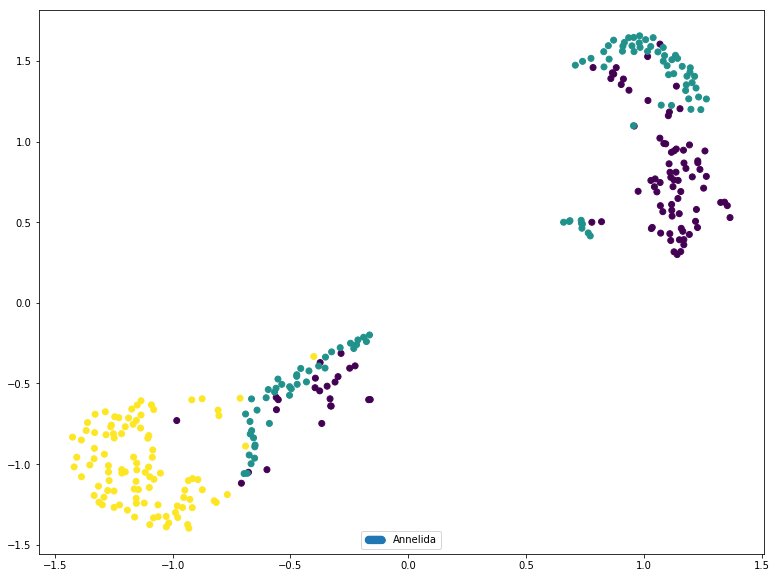

In [39]:
plt.figure(figsize=(13, 10))
plt.scatter(tsne_result_scaled[:,0], tsne_result_scaled[:,1], c = [conv_dict[i] for i in y_truth], label = list(conv_dict.keys()))
plt.legend(list(conv_dict.keys()),loc = "lower center", scatterpoints = 40)

In [ ]:
#Animator Code
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main(res):
    numframes = res.shape[0]
    color_data = [conv_dict[i] for i in y_truth]
    xy_data = res

    fig = plt.figure(figsize=(13, 10))
    scat = plt.scatter(res[0,:,0], res[0,:,1], c=color_data, s=100)
    plt.axis([-5, 5, -5, 5])

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(scat, xy_data))

    return(ani)

def update_plot(i, scat, xy):
    scat.set_offsets(xy[i])
    return scat,

ani = main(res = res)
HTML(ani.to_html5_video())

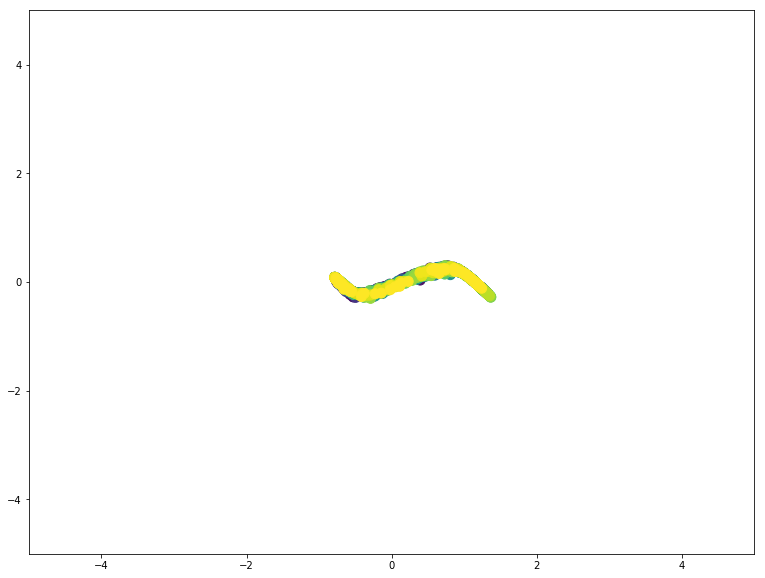

In [23]:
#Animation of the first 10 models using standart PCA. Only the first 2 Components are used for visualization
ani = main(res = res)
HTML(ani.to_html5_video())

In [19]:
# Code to move and split the dataset into test validate and training set.
def move_and_split_data_set(path):
    import glob
    import re
    import os
    from random import shuffle
    import shutil
    classes = glob.glob(path + "*")
    classes = [re.search(path + "(.*)", classes[i]).group(1) for i in range(len(classes))]
    folders = ["test", "validate", "train"]
    for i in folders:
        if i in classes: classes.remove(i)
    print("Number of classes: ",len(classes))
    for i in folders:
        print("Creating ",i,"-set")
        if not os.path.isdir(path + i):
            os.mkdir(path + i)
            
        for c in classes:
            print("Moving files: ", c)
            if not os.path.isdir(path + i + "/" + c):
                os.mkdir(path + i + "/" + c)
            files = glob.glob(path + c + "/*")
            shuffle(files)
            if i == "train":
                for f in files:
                    #print("moving train files: ",c)
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    # end for files
            else:
                for f in files[0:90]:
                    #print("moving test/val files: ",c)
                    shutil.move(f, path + i + "/" + c + re.search("/"+c+"(.*)", f).group(1) )
                    #end for files
    print("Removing Old class folders")
    for c in classes:
        os.rmdir(path + c)
    return classes

#fetch_data_set("Ex3/plankton_siamese/Euc/")

In [20]:
classes = move_and_split_data_set("data/")

Number of classes:  40
Creating  test -set
Moving files:  Brachyura
Moving files:  tail__Chaetognatha
Moving files:  Eucalanidae
Moving files:  nauplii__Crustacea
Moving files:  Cavoliniidae
Moving files:  egg__other
Moving files:  multiple__Copepoda
Moving files:  Bivalvia__Mollusca
Moving files:  Phaeodaria
Moving files:  Ostracoda
Moving files:  Penilia
Moving files:  Limacinidae
Moving files:  Oikopleuridae
Moving files:  nectophore__Diphyidae
Moving files:  Corycaeidae
Moving files:  Temoridae
Moving files:  egg__Actinopterygii
Moving files:  Foraminifera
Moving files:  Annelida
Moving files:  eudoxie__Diphyidae
Moving files:  Oncaeidae
Moving files:  Noctiluca
Moving files:  Doliolida
Moving files:  Decapoda
Moving files:  nauplii__Cirripedia
Moving files:  tail__Appendicularia
Moving files:  Haloptilus
Moving files:  Candaciidae
Moving files:  cyphonaute
Moving files:  Euchaetidae
Moving files:  multiple__other
Moving files:  Harpacticoida
Moving files:  Evadne
Moving files:  Co

In [78]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=40, affinity='euclidean', linkage='ward')  
y_pred = cluster.fit_predict(vecs)  

In [25]:
#list(conv_dict.keys())
#y_truth
from matplotlib import cm
viridis = cm.get_cmap('viridis', 40)
colors = [item for sublist in [[list(i)]*100 for i in viridis.colors] for item in sublist]
for (i,cla) in enumerate(set(y_truth)):
    #print(i,"and",cla)
    xc = [p for (j,p) in enumerate(tsne_result_scaled[:,0]) if y_truth[j]==cla]
    yc = [p for (j,p) in enumerate(tsne_result_scaled[:,1]) if y_truth[j]==cla]
    cols = [c for (j,c) in enumerate(colors) if y_truth[j]==cla]
    plt.scatter(xc,yc,c=cols,label=cla)
plt.legend(loc=-1, ncol = 3)

#[conv_dict[i] for i in y_truth]
#plt.scatter(pca_result_5[:,0], pca_result_5[:,1], c = [conv_dict[i] for i in y_truth])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0293a46510> (for post_execute):


TypeError: 'int' object is not iterable

TypeError: 'int' object is not iterable

<Figure size 432x288 with 1 Axes>